<a href="https://colab.research.google.com/github/Neelanjana000/Oasis_Infobyte_DS/blob/main/Iris_Flower_Classification(Task_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Load and Explore the Dataset

In [ ]:
data = pd.read_csv("/content/Iris.csv")

print("🔹 First five rows of the dataset:")
print(data.head(), "\n")

print("🔹 Dataset Info:")
print(data.info(), "\n")

print("🔹 Checking for missing values:")
print(data.isnull().sum(), "\n")

print("🔹 Dataset Description:")
print(data.describe(), "\n")

data = data.drop(columns=['Id'])

🔹 First five rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa 

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), 

Data Visualization

/tmp/ipython-input-2084474614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=data, palette='Set2')


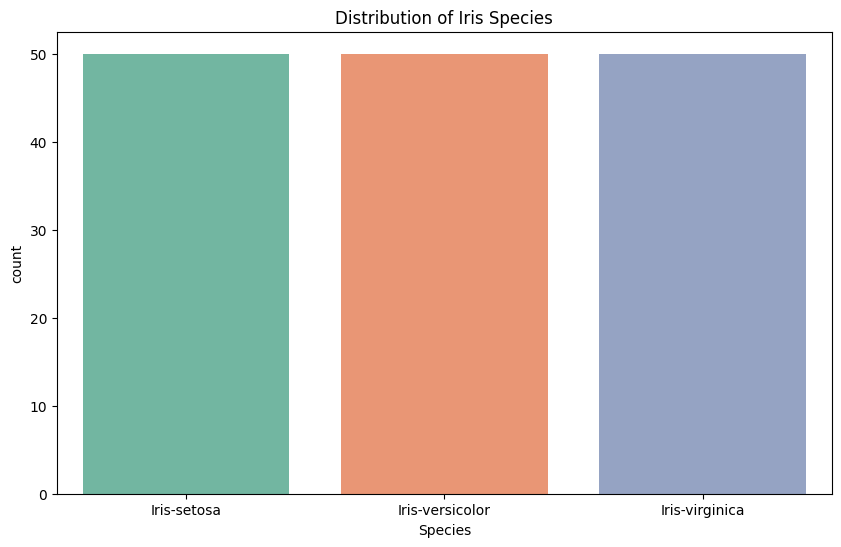

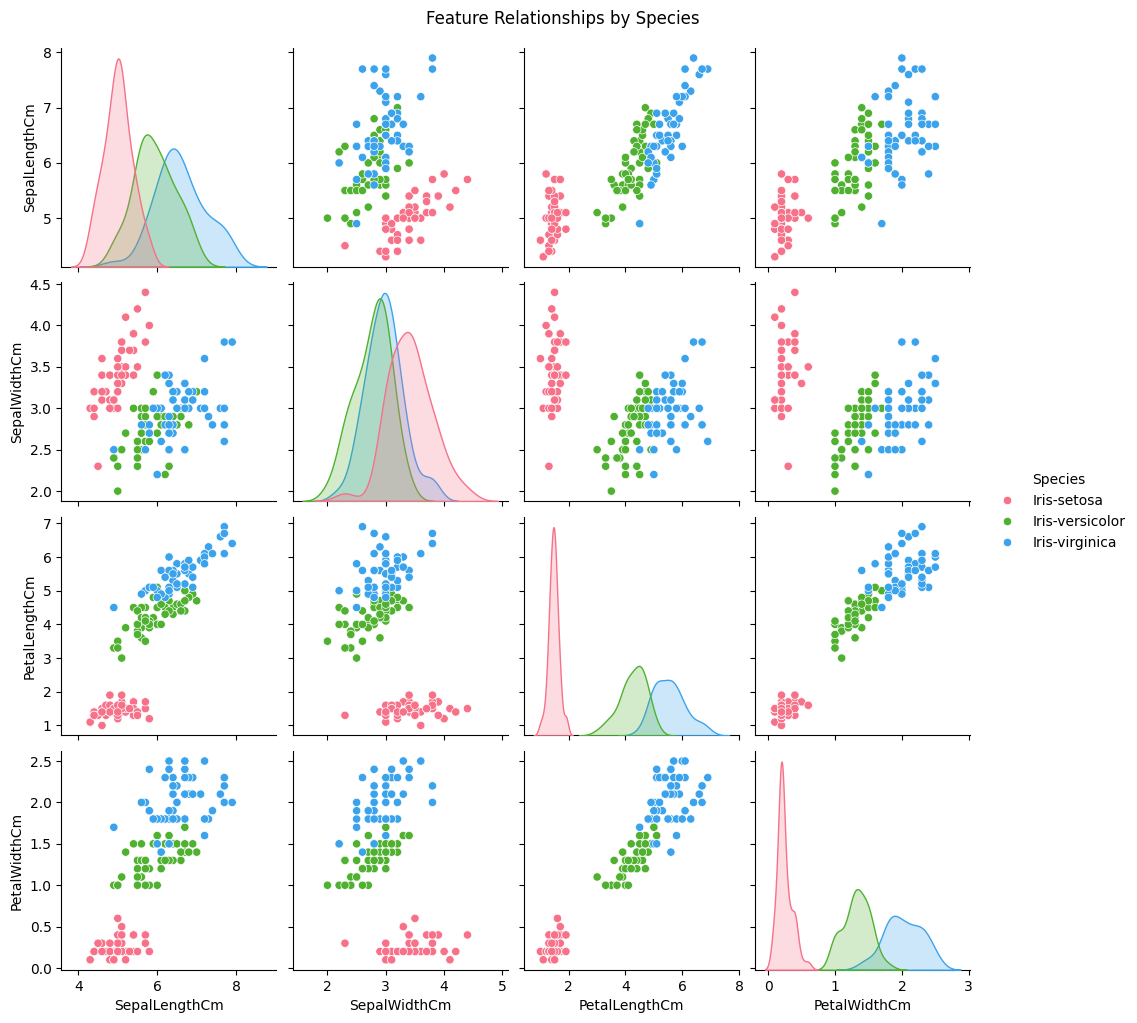

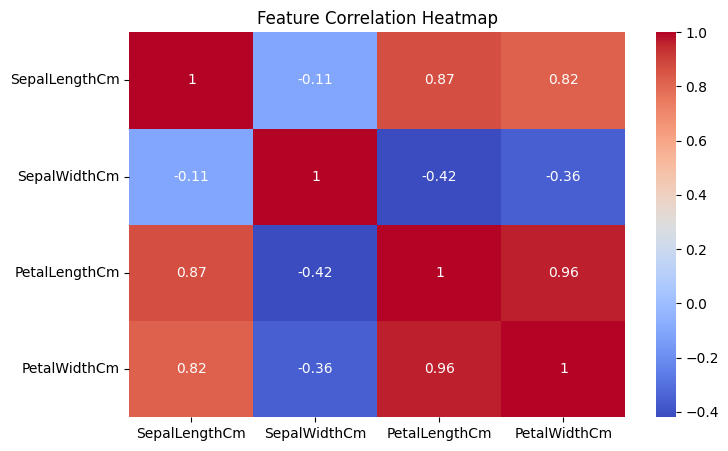

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Species', data=data, palette='Set2')
plt.title("Distribution of Iris Species")
plt.show()

sns.pairplot(data, hue='Species', palette='husl')
plt.suptitle("Feature Relationships by Species", y=1.02)
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(data.drop(columns=['Species']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Preprocessing

In [ ]:
X = data.drop(columns=['Species'])
y = data['Species']

le = LabelEncoder()
y = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

Train Different Models

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"✅ {name} Accuracy: {acc*100:.2f}%")


✅ Logistic Regression Accuracy: 100.00%
✅ K-Nearest Neighbors Accuracy: 100.00%
✅ Decision Tree Accuracy: 100.00%
✅ Support Vector Machine Accuracy: 96.67%


Compare Model Performance

/tmp/ipython-input-3060543347.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


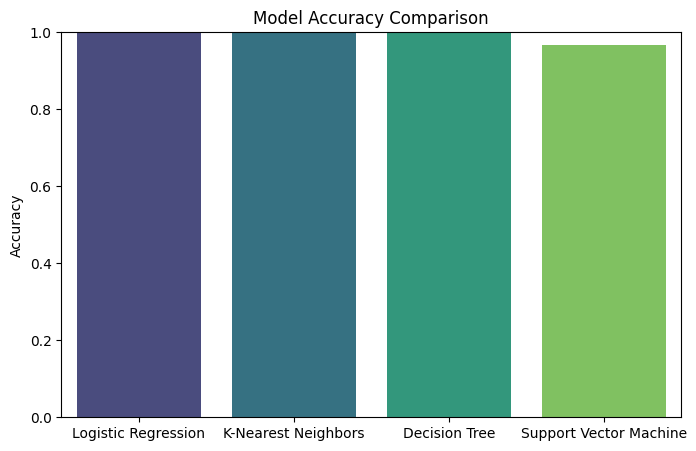

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


Evaluate the Best Model

In [ ]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\n🏆 Best Model: {best_model_name}")

y_pred = best_model.predict(X_test)

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))



🏆 Best Model: Logistic Regression

📊 Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

🧾 Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Test with a New Sample

In [ ]:
sample = np.array([[5.1, 3.5, 1.4, 0.2]])
sample_scaled = scaler.transform(X)
prediction = best_model.predict(X_scaled)
pred_species = le.inverse_transform(prediction)
print(f"\n🌼 Predicted Species for {sample}: {pred_species[0]}")


🌼 Predicted Species for [[5.1 3.5 1.4 0.2]]: Iris-setosa
